Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yutik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yutik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 1. Data Collection

In [2]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1") # importing the SPAM SMS Collection Dataset

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3070,ham,Apart from the one i told you about yesterday?,NaN,NaN,NaN
2042,ham,"Me not waking up until 4 in the afternoon, sup",NaN,NaN,NaN
714,ham,He also knows about lunch menu only da. . I know,NaN,NaN,NaN
3456,ham,Friendship poem: Dear O Dear U R Not Near But ...,NaN,NaN,NaN
874,ham,Talk With Yourself Atleast Once In A Day...!!!...,NaN,NaN,NaN


# 2. Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop the columns which have very less values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
4829,ham,"The word \Checkmate\"" in chess comes from the ..."
2134,ham,If he started searching he will get job in few...
1590,ham,Somewhr someone is surely made 4 u. And God ha...
1520,spam,"URGENT! Your Mobile No was awarded a ?2,000 Bo..."
3101,ham,Even if he my friend he is a priest call him now


In [7]:
#rename the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.sample(5)

,target,text
4955,ham,Ahhhh...just woken up!had a bad dream about u ...
650,ham,Thats cool! Sometimes slow and gentle. Sonetim...
2129,ham,Mine here like all fr china then so noisy.
5565,ham,Huh y lei...
1801,ham,I wanna watch that movie


In [9]:
#converting text to numeric values.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target']=encoder.fit_transform(df['target']) 

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check for any missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

409

In [13]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5163, 2)

# 3. EDA

In [16]:
df['target'].value_counts() # 0 => ham and 1 => spam

0    4516
1     647
Name: target, dtype: int64

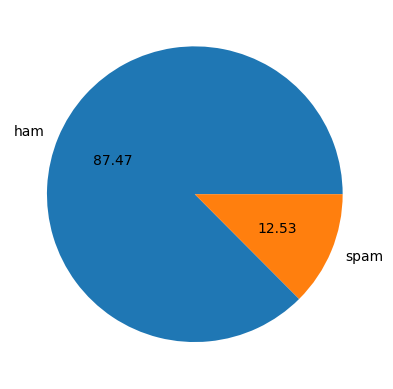

In [17]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
# Data is imbalanced

In [19]:
#length of message

df['num_char'] = df['text'].apply(len)

In [20]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# numbers of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) # breaking sms into words and counting the length of the list

In [22]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#count the number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
#description / summary
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5163.000000,5163.000000,5163.000000
mean,78.811156,18.606624,2.015107
std,58.153491,13.416336,1.484312
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,2.000000
75%,116.000000,26.000000,3.000000
max,910.000000,220.000000,38.000000


In [26]:
#description for ham messages
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.241585,1.876661
std,56.356310,13.549707,1.430122
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#description for spam messages
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,647.000000,647.000000,647.000000
mean,137.318393,28.134467,2.981453
std,30.096861,7.154996,1.497044
min,13.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,33.000000,4.000000
max,223.000000,47.000000,9.000000


<AxesSubplot: xlabel='num_char', ylabel='Count'>

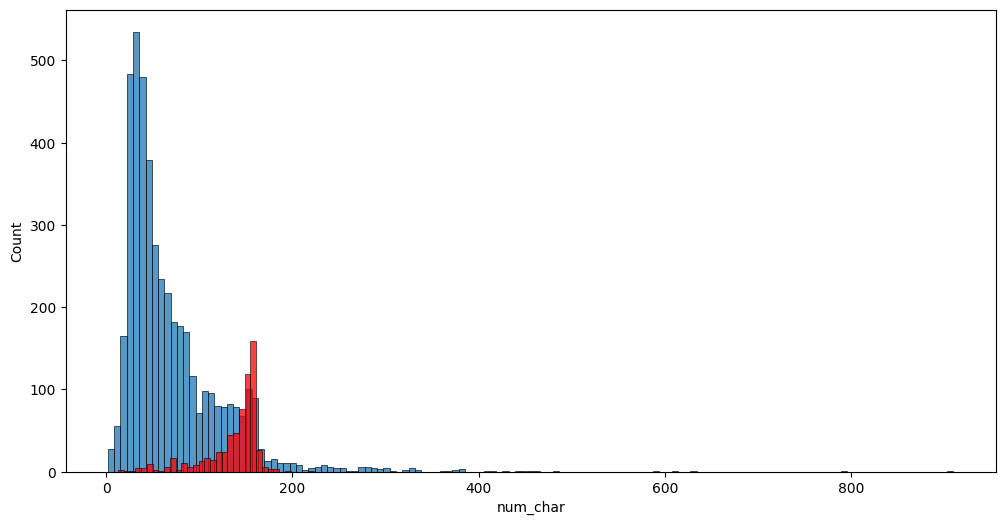

In [28]:
# visualizing using histogram
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char']) #ham
sns.histplot(df[df['target']==1]['num_char'],color='red') #spam

<AxesSubplot: xlabel='num_words', ylabel='Count'>

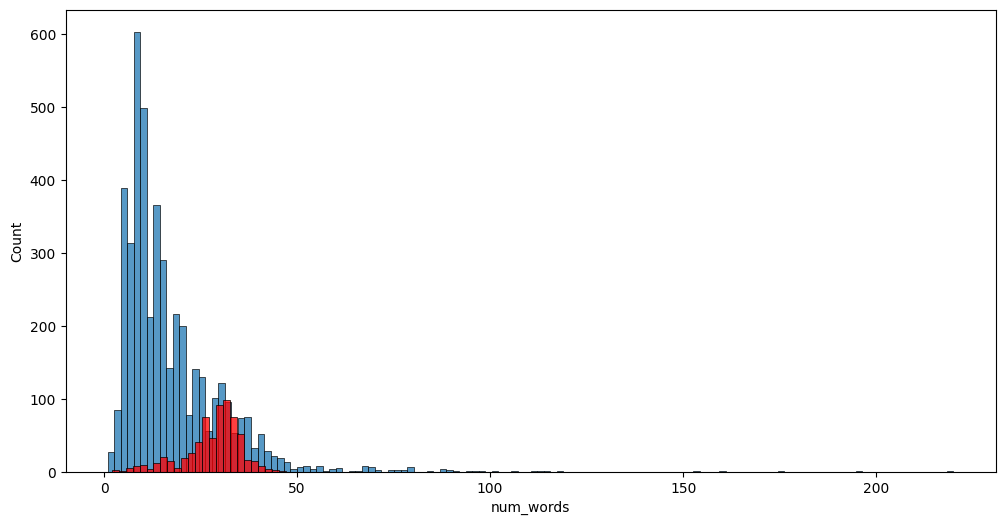

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words']) #ham
sns.histplot(df[df['target']==1]['num_words'],color='red') #spam

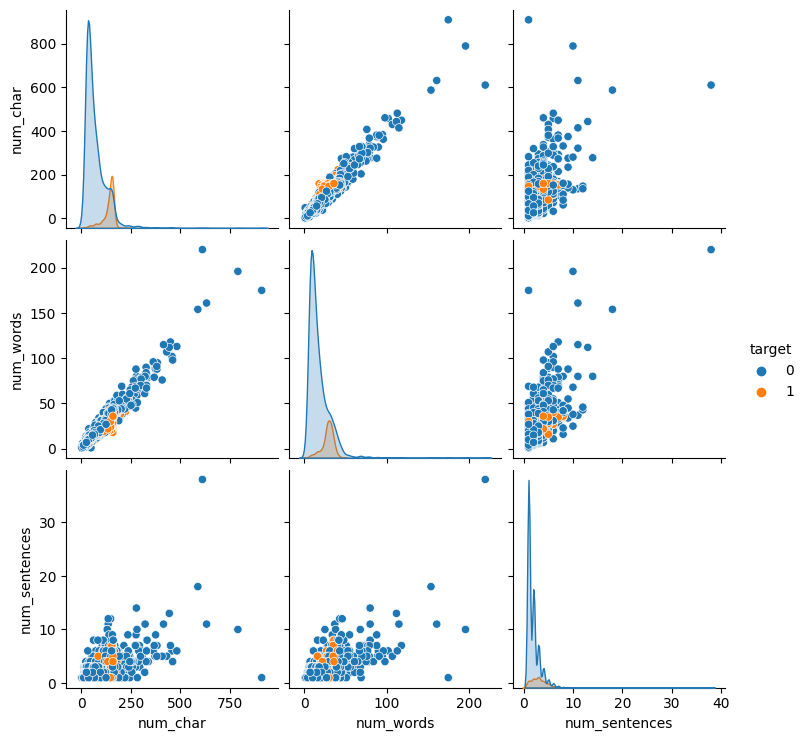

In [30]:
sns.pairplot(df,hue='target') #relation between characters, words and sentences

C:\Users\Yutik\AppData\Local\Temp\ipykernel_20076\1279228754.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

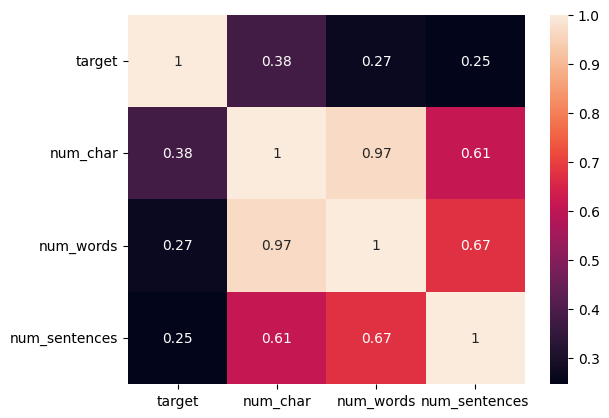

In [31]:
#correlation coefficient
sns.heatmap(df.corr(),annot=True)

In [32]:
from nltk.corpus import stopwords

# 4. Data Preprocessing
1. Lowercase 
2. Tokenization 
3. Removing special characters
4. Removing stop words
5. Stemming

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    text = text.lower()                         # lowercase
    text = nltk.word_tokenize(text)             #tokenization i.e. converting into words
    
    y=[]
    for i in text:                              #Removing special characters
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
transform_text("Did you went to play yesterday? If you did, then which game did you played?")

'went play yesterday game play'

In [36]:
df['transformed_text']=df['text'].apply(transform_text) # transforming the text using the function we made.

In [37]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
# Creating Word cloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [39]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))  #creating wordcloud for spam words

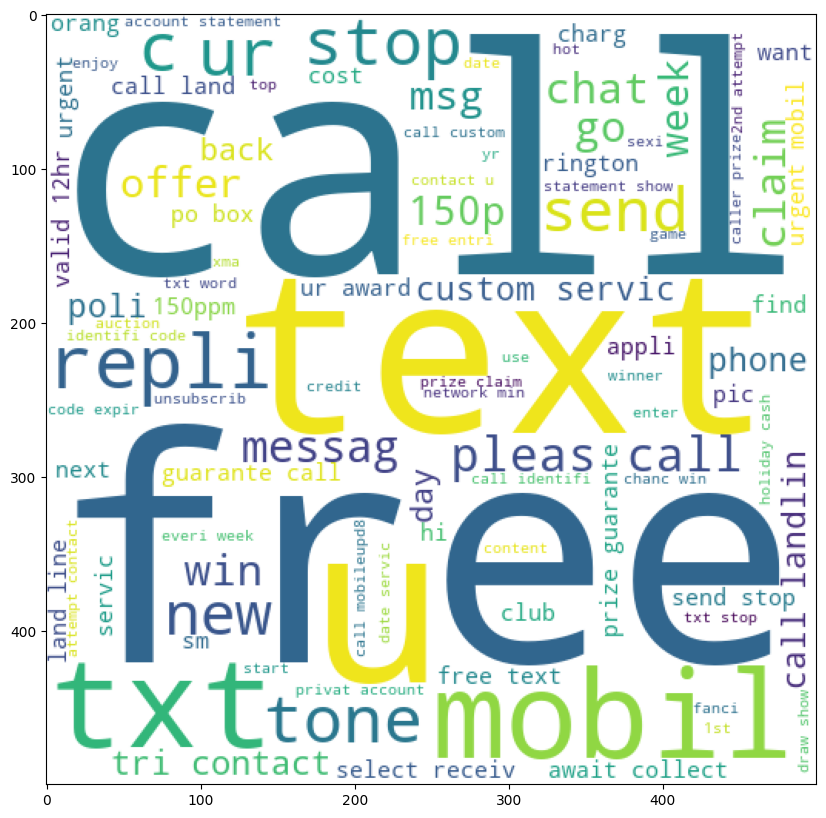

In [40]:
plt.figure(figsize=(15,10))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))  #creating wordcloud for ham words

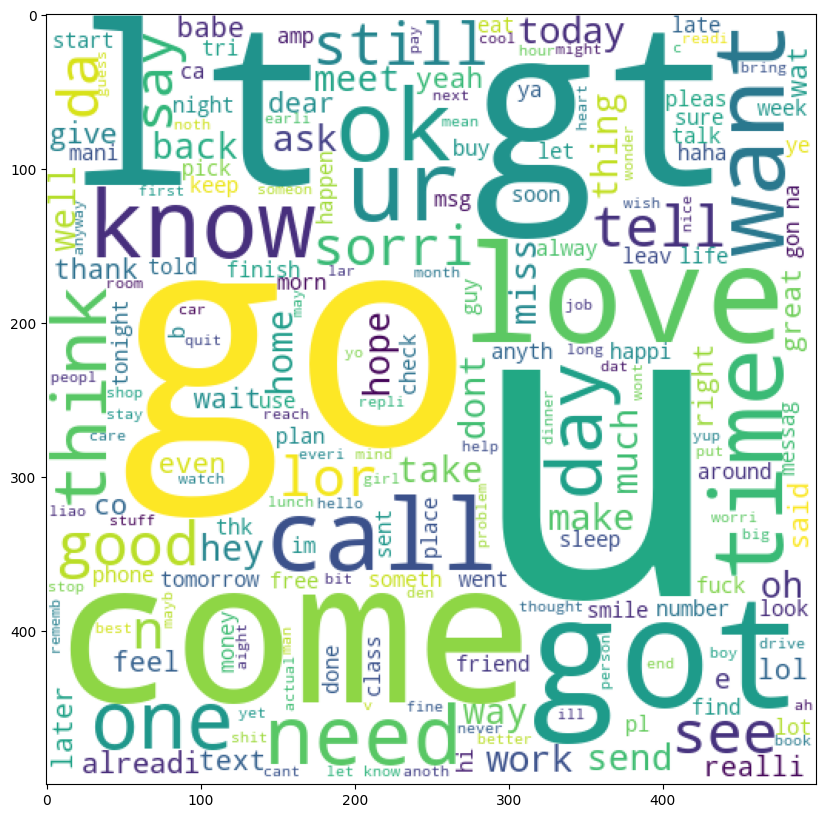

In [42]:
plt.figure(figsize=(15,10))
plt.imshow(ham_wc)

In [43]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

10067

In [45]:
from collections import Counter

In [46]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,321
1,free,188
2,2,155
3,txt,140
4,text,122
5,ur,119
6,u,118
7,mobil,110
8,stop,104
9,repli,103


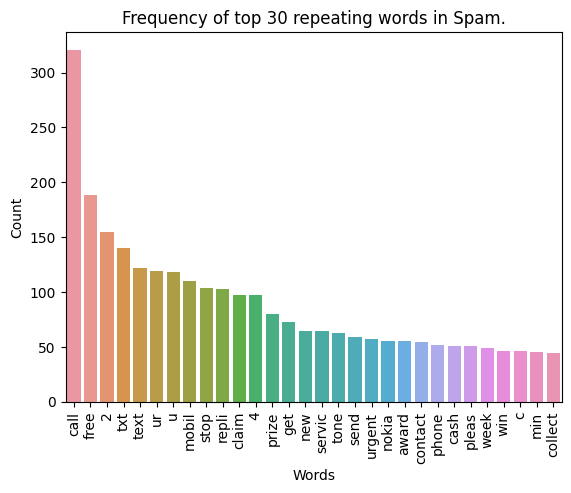

In [47]:
import seaborn as sns
ax=sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
ax.set(xlabel='Words')
ax.set(ylabel="Count")
ax.set_title("Frequency of top 30 repeating words in Spam.")
plt.show()

In [48]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35336

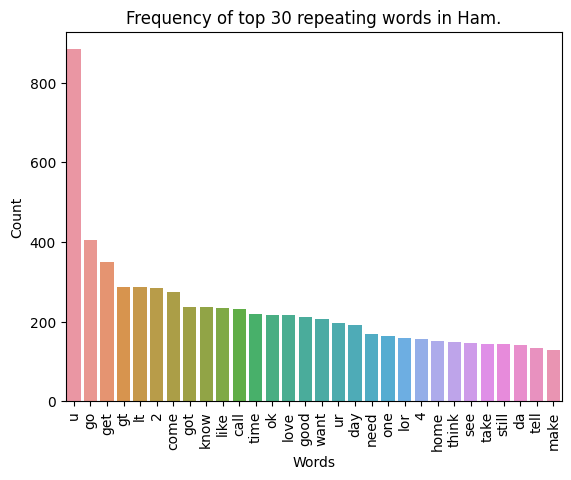

In [50]:
ax=sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
ax.set(xlabel='Words')
ax.set(ylabel="Count")
ax.set_title("Frequency of top 30 repeating words in Ham.")
plt.show()

In [51]:
# Vectorization of textual data
from sklearn.feature_extraction.text import TfidfVectorizer #tfidf
tfidf=TfidfVectorizer(max_features=5900)
x = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

# 5. Model Building

In [52]:
x.shape

(5163, 5900)

In [53]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [55]:
# testing differernt algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)

In [57]:
clfs = {
    'KN':knc,
    'NB':mnb,
    'RF':rfc,
    'ETC':etc
}

In [58]:
# function returns accuracy and precision along with confusion matrix.
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    confusion_m = confusion_matrix(y_test,y_pred)
    
    return accuracy,precision,confusion_m

In [59]:
accuracy_scores =[]
precision_scores = []
confusion_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision,current_confusion_m = train_classifier(clf, x_train,y_train,x_test,y_test)
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print(current_confusion_m)
    print("====================================")
        
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    confusion_scores = confusion_scores+list(current_confusion_m)

For  KN
Accuracy -  0.9070667957405615
Precision -  1.0
[[912   0]
 [ 96  25]]
For  NB
Accuracy -  0.9632139399806389
Precision -  1.0
[[912   0]
 [ 38  83]]
For  RF
Accuracy -  0.972894482090997
Precision -  1.0
[[912   0]
 [ 28  93]]
For  ETC
Accuracy -  0.9806389157792836
Precision -  1.0
[[912   0]
 [ 20 101]]


In [60]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [61]:
performance_df #accuracy and precision of various algorithm

,Algorithm,Accuracy,Precision
0,KN,0.907067,1.0
1,NB,0.963214,1.0
2,RF,0.972894,1.0
3,ETC,0.980639,1.0


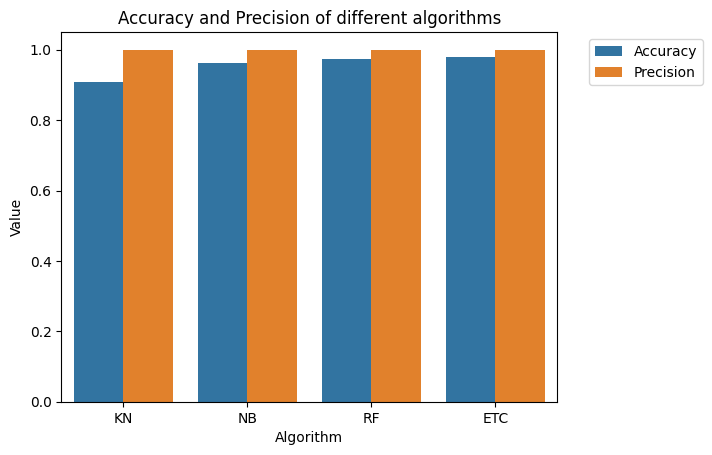

In [62]:
# Melt the DataFrame to "long" format
data_melted = pd.melt(performance_df, id_vars=["Algorithm"], var_name="Metric", value_name="Value")
ax=sns.barplot(x="Algorithm", y="Value", hue="Metric", data=data_melted)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Algorithm")
plt.ylabel("Value")
plt.title("Accuracy and Precision of different algorithms")
plt.show()

In [63]:
#Creating a pipeline and converting it into a website
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))